In [1]:
# LOAD Packages 
import uproot
import pandas as pd
import numpy as np
import awkward as ak
!pip install awkward_pandas
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import os
import math
import csv
import seaborn as sns
import sympy as smp
import sympy.stats
from scipy import stats,signal,ndimage,special,fft
from scipy.optimize import curve_fit
from scipy.integrate import quad
from mpl_toolkits.axes_grid1 import make_axes_locatable

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# open file
ixns = uproot.open("/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_CC_pi0/caf_studies/plotting/pi0_event_sample_from_truth_FULL_sig_bkg_dict.root ")
#true_ixns = uproot.open("/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_CC_pi0/caf_studies/pi0_truth_based_sample.root")
#true_tracks = uproot.open("/exp/dune/app/users/ehinkle/nd_analysis/2x2_CAFs/reco_studies/pi0_reco_based_sample.root")
ixns["RecoBenchmarkTree"].show()
ixns["RecoBenchmarkTree"].keys()
#ixns["RecoBenchmarkTree"][0].num_entries
#ixns["RecoBenchmarkTree"]['caf_file_name']

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
reco_ixn_gamma_mult  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_e_mult      | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_index       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
reco_ixn_cont_gam... | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_e_cont_mult | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_muon_mult   | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_chpi_mult   | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_proton_mult | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_chkaon_mult | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
reco_ixn_vtx_x_pos   | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
reco_ixn_vtx_y_pos   | std::

['reco_ixn_gamma_mult',
 'reco_ixn_e_mult',
 'reco_ixn_index',
 'reco_ixn_cont_gamma_mult',
 'reco_ixn_e_cont_mult',
 'reco_ixn_muon_mult',
 'reco_ixn_chpi_mult',
 'reco_ixn_proton_mult',
 'reco_ixn_chkaon_mult',
 'reco_ixn_vtx_x_pos',
 'reco_ixn_vtx_y_pos',
 'reco_ixn_vtx_z_pos',
 'true_ixn_pi0_mult',
 'true_ixn_cont_pi0_mult',
 'true_ixn_e_mult',
 'true_ixn_gamma_mult',
 'true_ixn_index',
 'true_ixn_muon_mult',
 'true_ixn_chpi_mult',
 'true_ixn_proton_mult',
 'true_ixn_chkaon_mult',
 'true_ixn_vtx_x_pos',
 'true_ixn_vtx_y_pos',
 'true_ixn_vtx_z_pos',
 'spill_index',
 'file_index',
 'event',
 'run',
 'subrun',
 'caf_file_name',
 'truth_dict_key',
 'overlap']

In [4]:
# Set up data frame
ak_array = ixns["RecoBenchmarkTree"].arrays(library="ak")
df = ak.to_dataframe(ak_array)
df = df.reset_index(drop=True)
#print("Number of entries in data frame: ", len(df))
df

# Set up data from for truth
#ak_array_true = true_ixns["RecoBenchmarkTree"].arrays(library="ak")
#df_true = ak.to_dataframe(ak_array_true)
#df_true = df_true.reset_index(drop=True)
#DEFINE: Bins for num pi0s /m multiplicities
#num_pi0_bins = 50
#max_num_pi0s = 50
#pi0_mult_bins = np.linspace(-1,max_num_pi0s, num_pi0_bins+2)


,reco_ixn_gamma_mult,reco_ixn_e_mult,reco_ixn_index,reco_ixn_cont_gamma_mult,reco_ixn_e_cont_mult,reco_ixn_muon_mult,reco_ixn_chpi_mult,reco_ixn_proton_mult,reco_ixn_chkaon_mult,reco_ixn_vtx_x_pos,...,true_ixn_vtx_y_pos,true_ixn_vtx_z_pos,spill_index,file_index,event,run,subrun,caf_file_name,truth_dict_key,overlap
0,1,1,1.0,1,1,0,2,0,0,-5.985901,...,33.0,-31.0,14,0,13,0,0,MiniRun6.2_1E19_RHC.caf.0000000.CAF.flat.root,14-61,0.978903
1,0,0,1.0,0,0,0,1,1,0,62.741104,...,-3.0,55.0,29,0,27,0,0,MiniRun6.2_1E19_RHC.caf.0000000.CAF.flat.root,29-1000043,0.940552
2,1,0,0.0,0,0,1,0,0,0,47.222099,...,16.0,-22.0,35,0,33,0,0,MiniRun6.2_1E19_RHC.caf.0000000.CAF.flat.root,35-1000078,0.986261
3,0,0,0.0,0,0,1,0,1,0,-14.188801,...,27.0,-4.0,74,0,70,0,0,MiniRun6.2_1E19_RHC.caf.0000000.CAF.flat.root,74-3000085,0.992063
4,2,0,3.0,1,0,1,2,0,0,7.907298,...,2.0,31.0,83,0,79,0,0,MiniRun6.2_1E19_RHC.caf.0000000.CAF.flat.root,83-4000047,0.958454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090,2,0,1.0,1,0,1,0,1,0,-42.566399,...,-33.0,9.0,63,1023,61,0,0,MiniRun6.2_1E19_RHC.caf.0001023.CAF.flat.root,1023063-10233000018,0.950207
9091,0,0,3.0,0,0,0,0,0,0,-55.203300,...,-33.0,9.0,63,1023,61,0,0,MiniRun6.2_1E19_RHC.caf.0001023.CAF.flat.root,1023063-10233000018,0.023013
9092,0,0,0.0,0,0,3,0,0,0,37.467300,...,57.0,-29.0,73,1023,71,0,0,MiniRun6.2_1E19_RHC.caf.0001023.CAF.flat.root,1023073-10233000062,0.991779
9093,2,1,0.0,1,1,1,1,1,0,41.162296,...,49.0,34.0,163,1023,158,0,0,MiniRun6.2_1E19_RHC.caf.0001023.CAF.flat.root,1023163-10238000016,0.958920


Number of 1:1 truth:reco interactions: 6834
Number of 1:N truth:reco interactions (entries): 2261
Number of 1:N truth:reco interactions (unique truth_dict_keys): 1007
Check -- Total Entries: 9095
Check -- Total Unique Truth Dict Keys: 7841
Number of 1:1 truth:reco interactions (1pi0): 3388
Number of 1:N truth:reco interactions (entries) (1pi0): 969
Number of 1:N truth:reco interactions (unique truth_dict_keys) (1pi0): 439


(0.0, 1.0)

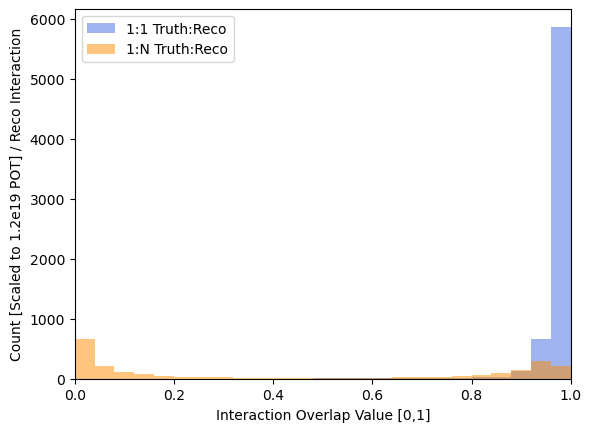

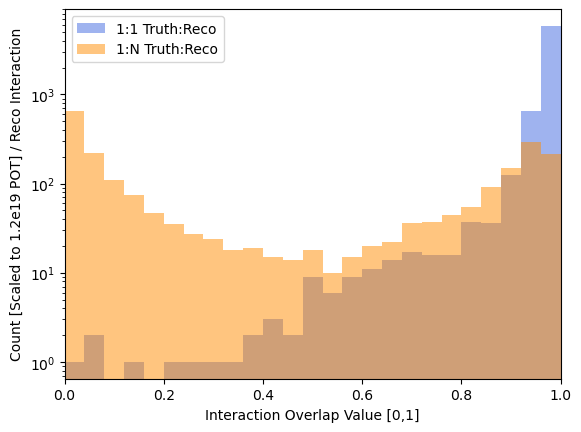

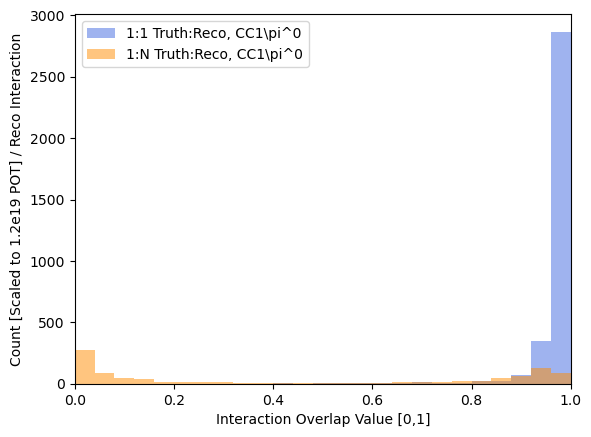

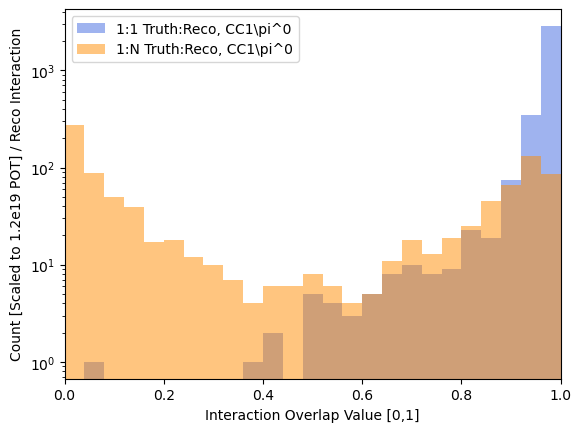

In [ ]:
number_unique_ixns = len(df['truth_dict_key'].unique())
df_unique_match = df.groupby('truth_dict_key').filter(lambda x: len(x) == 1)
print("Number of 1:1 truth:reco interactions:", len(df_unique_match))
df_multi_match = df.groupby('truth_dict_key').filter(lambda x: len(x) > 1)
print("Number of 1:N truth:reco interactions (entries):", len(df_multi_match))
print("Number of 1:N truth:reco interactions (unique truth_dict_keys):", len(df_multi_match['truth_dict_key'].unique()))
print("Check -- Total Entries:", len(df_unique_match) + len(df_multi_match))
print("Check -- Total Unique Truth Dict Keys:", len(df['truth_dict_key'].unique()))

# Histogram -- ixn overlap (1:1, 1:N)
ovlp_bins = np.linspace(0.,1., 26)
fig, ax = plt.subplots()
plt.hist(df_unique_match['overlap'], histtype='stepfilled',  bins=ovlp_bins, label='1:1 Truth:Reco', color='royalblue', alpha=0.5)
plt.hist(df_multi_match['overlap'], histtype='stepfilled', bins=ovlp_bins,  label='1:N Truth:Reco', color='darkorange', alpha=0.5)
ax.set_xlabel(r"Interaction Overlap Value [0,1]")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Reco Interaction")
plt.legend()
plt.xlim(0.,1.)

ovlp_bins = np.linspace(0.,1., 26)
fig, ax = plt.subplots()
plt.hist(df_unique_match['overlap'], histtype='stepfilled',  bins=ovlp_bins, label='1:1 Truth:Reco', color='royalblue', alpha=0.5)
plt.hist(df_multi_match['overlap'], histtype='stepfilled',  bins=ovlp_bins, label='1:N Truth:Reco', color='darkorange', alpha=0.5)
ax.set_xlabel(r"Interaction Overlap Value [0,1]")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Reco Interaction")
plt.legend()
ax.set_yscale('log')
plt.xlim(0.,1.)

df_cc1pi0 = df[df['true_ixn_pi0_mult'] == 1]
df_cc1pi0_unique_match = df_cc1pi0.groupby('truth_dict_key').filter(lambda x: len(x) == 1)
df_cc1pi0_multi_match = df_cc1pi0.groupby('truth_dict_key').filter(lambda x: len(x) > 1)
print("Number of 1:1 truth:reco interactions (1pi0):", len(df_cc1pi0_unique_match))
print("Number of 1:N truth:reco interactions (entries) (1pi0):", len(df_cc1pi0_multi_match))
print("Number of 1:N truth:reco interactions (unique truth_dict_keys) (1pi0):", len(df_cc1pi0_multi_match['truth_dict_key'].unique()))

# Histogram -- ixn overlap (1:1, 1:N) -- 1pi0
ovlp_bins = np.linspace(0.,1., 26)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['overlap'], histtype='stepfilled',  bins=ovlp_bins, label=r'1:1 Truth:Reco, CC1\pi^0', color='royalblue', alpha=0.5)
plt.hist(df_cc1pi0_multi_match['overlap'], histtype='stepfilled', bins=ovlp_bins,  label=r'1:N Truth:Reco, CC1\pi^0', color='darkorange', alpha=0.5)
ax.set_xlabel(r"Interaction Overlap Value [0,1]")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Reco Interaction")
plt.legend()
plt.xlim(0.,1.)

ovlp_bins = np.linspace(0.,1., 26)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['overlap'], histtype='stepfilled',  bins=ovlp_bins, label=r'1:1 Truth:Reco, CC1\pi^0', color='royalblue', alpha=0.5)
plt.hist(df_cc1pi0_multi_match['overlap'], histtype='stepfilled',  bins=ovlp_bins, label=r'1:N Truth:Reco, CC1\pi^0', color='darkorange', alpha=0.5)
ax.set_xlabel(r"Interaction Overlap Value [0,1]")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Reco Interaction")
plt.legend()
ax.set_yscale('log')
plt.xlim(0.,1.)





(-6.0, 3.0)

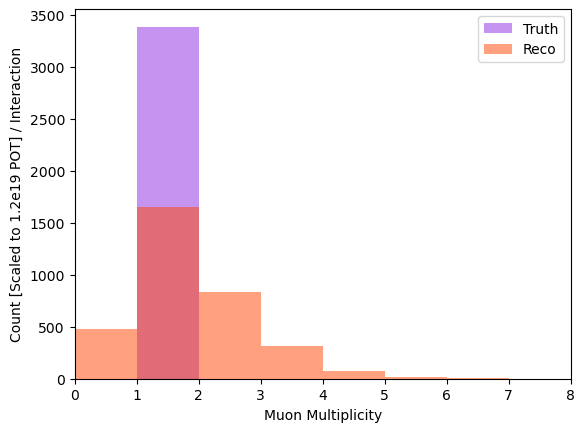

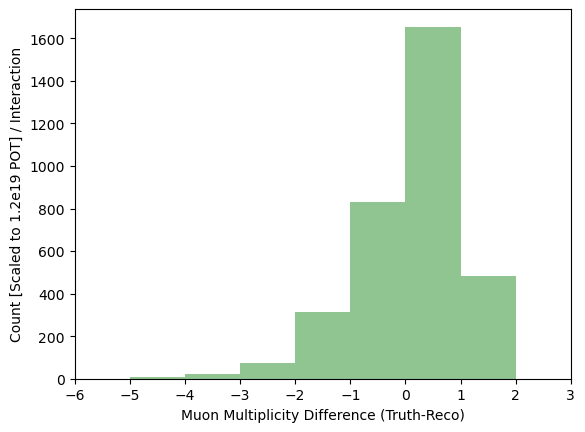

In [20]:
# histogram -- muon mult cc1pi0
muon_mult_bins = np.linspace(0,10,11)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['true_ixn_muon_mult'], histtype='stepfilled',  bins=muon_mult_bins, label=r'Truth', color='blueviolet', alpha=0.5)
plt.hist(df_cc1pi0_unique_match['reco_ixn_muon_mult'], histtype='stepfilled', bins=muon_mult_bins, label=r'Reco', color='orangered', alpha=0.5)
ax.set_xlabel(r"Muon Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
plt.legend()
plt.xlim(0,8)

# histogram -- muon mult difference
muon_mult_diff_bins = np.linspace(-10,5,16)
fig, ax = plt.subplots()
plt.hist((df_cc1pi0_unique_match['true_ixn_muon_mult']-df_cc1pi0_unique_match['reco_ixn_muon_mult']), histtype='stepfilled', bins= muon_mult_diff_bins, label=r'Truth - Reco', color='forestgreen', alpha=0.5)
ax.set_xlabel(r"Muon Multiplicity Difference (Truth-Reco)")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
#plt.legend()
plt.xlim(-6,3)


(-5.0, 10.0)

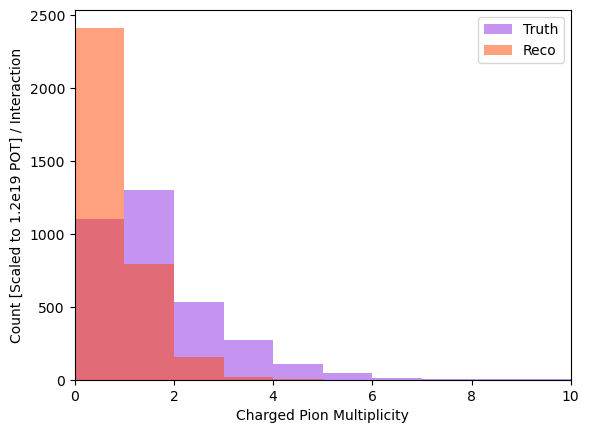

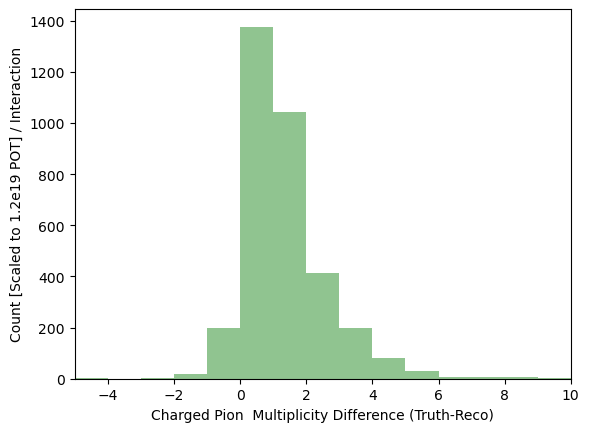

In [ ]:
# histogram -- charged pion mult cc1pi0
mult_bins = np.linspace(0,20,21)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['true_ixn_chpi_mult'], histtype='stepfilled',  bins=mult_bins, label=r'Truth', color='blueviolet', alpha=0.5)
plt.hist(df_cc1pi0_unique_match['reco_ixn_chpi_mult'], histtype='stepfilled', bins=mult_bins, label=r'Reco', color='orangered', alpha=0.5)
ax.set_xlabel(r"Charged Pion Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
plt.legend()
plt.xlim(0,10)

# histogram -- charged pion mult difference
mult_diff_bins = np.linspace(-20,20,41)
fig, ax = plt.subplots()
plt.hist((df_cc1pi0_unique_match['true_ixn_chpi_mult']-df_cc1pi0_unique_match['reco_ixn_chpi_mult']), histtype='stepfilled', bins= mult_diff_bins, label=r'Truth - Reco', color='forestgreen', alpha=0.5)
ax.set_xlabel(r"Charged Pion  Multiplicity Difference (Truth-Reco)")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
#plt.legend()
plt.xlim(-5,10)

(-4.0, 4.0)

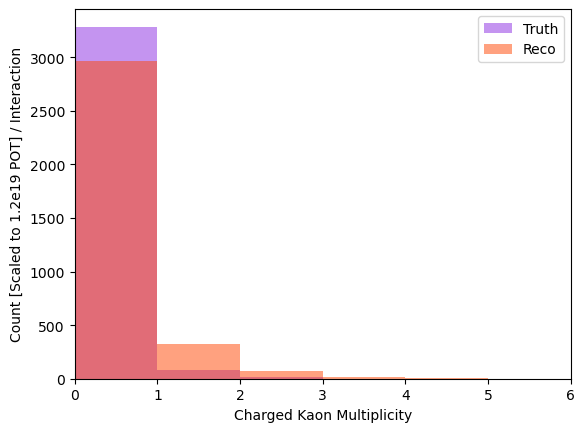

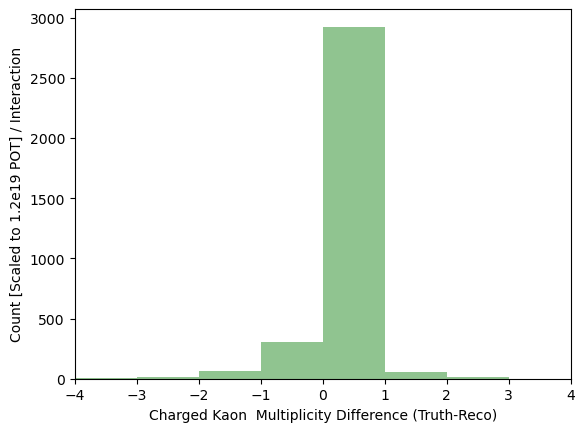

In [25]:
# histogram -- charged kaon mult cc1pi0
mult_bins = np.linspace(0,20,21)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['true_ixn_chkaon_mult'], histtype='stepfilled',  bins=mult_bins, label=r'Truth', color='blueviolet', alpha=0.5)
plt.hist(df_cc1pi0_unique_match['reco_ixn_chkaon_mult'], histtype='stepfilled', bins=mult_bins, label=r'Reco', color='orangered', alpha=0.5)
ax.set_xlabel(r"Charged Kaon Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
plt.legend()
plt.xlim(0,6)

# histogram -- charged kaon mult difference
mult_diff_bins = np.linspace(-20,20,41)
fig, ax = plt.subplots()
plt.hist((df_cc1pi0_unique_match['true_ixn_chkaon_mult']-df_cc1pi0_unique_match['reco_ixn_chkaon_mult']), histtype='stepfilled', bins= mult_diff_bins, label=r'Truth - Reco', color='forestgreen', alpha=0.5)
ax.set_xlabel(r"Charged Kaon  Multiplicity Difference (Truth-Reco)")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
#plt.legend()
plt.xlim(-4,4)

(-5.0, 20.0)

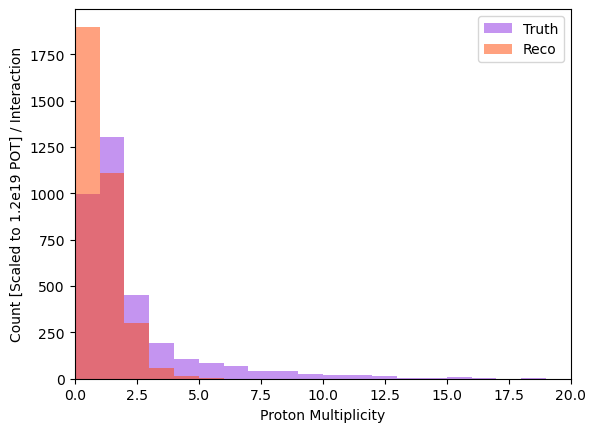

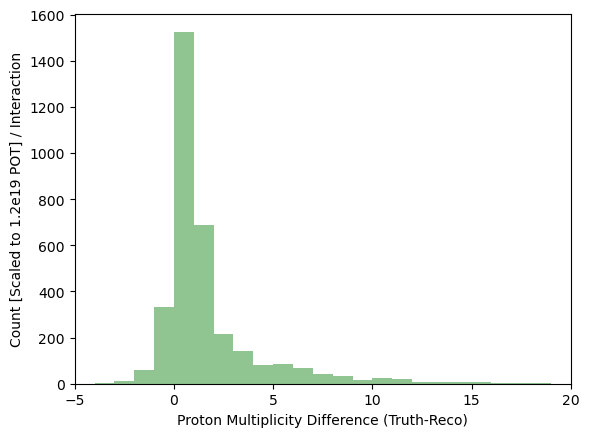

In [27]:
# histogram -- proton mult cc1pi0
mult_bins = np.linspace(0,20,21)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['true_ixn_proton_mult'], histtype='stepfilled',  bins=mult_bins, label=r'Truth', color='blueviolet', alpha=0.5)
plt.hist(df_cc1pi0_unique_match['reco_ixn_proton_mult'], histtype='stepfilled', bins=mult_bins, label=r'Reco', color='orangered', alpha=0.5)
ax.set_xlabel(r"Proton Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
plt.legend()
plt.xlim(0,20)

# histogram -- proton mult difference
mult_diff_bins = np.linspace(-20,20,41)
fig, ax = plt.subplots()
plt.hist((df_cc1pi0_unique_match['true_ixn_proton_mult']-df_cc1pi0_unique_match['reco_ixn_proton_mult']), histtype='stepfilled', bins= mult_diff_bins, label=r'Truth - Reco', color='forestgreen', alpha=0.5)
ax.set_xlabel(r"Proton Multiplicity Difference (Truth-Reco)")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
#plt.legend()
plt.xlim(-5,20)

(0.0, 5.0)

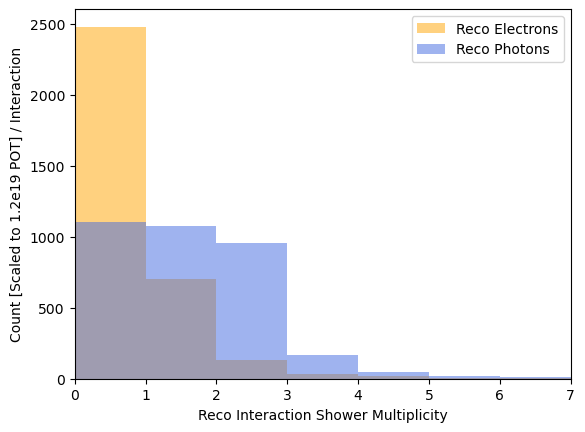

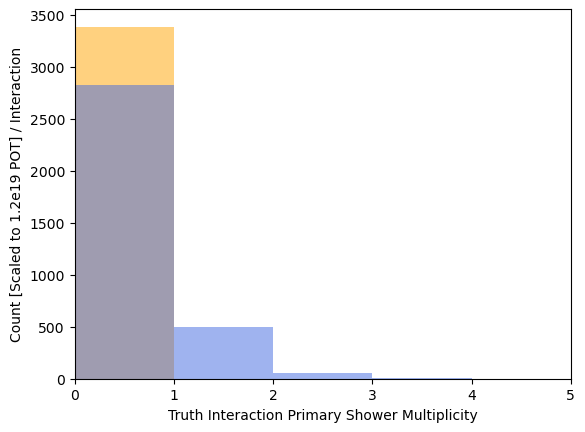

In [32]:
# histogram -- reco electron and gamma mult cc1pi0
mult_bins = np.linspace(0,20,21)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['reco_ixn_e_mult'], histtype='stepfilled',  bins=mult_bins, label=r'Reco Electrons', color='orange', alpha=0.5)
plt.hist(df_cc1pi0_unique_match['reco_ixn_gamma_mult'], histtype='stepfilled', bins=mult_bins, label=r'Reco Photons', color='royalblue', alpha=0.5)
ax.set_xlabel(r"Reco Interaction Shower Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
plt.legend()
plt.xlim(0,7)

# histogram -- true primary electron and gamma mult difference
#mult_diff_bins = np.linspace(-20,20,41)
fig, ax = plt.subplots()
plt.hist(df_cc1pi0_unique_match['true_ixn_e_mult'], histtype='stepfilled',  bins=mult_bins, label=r'Reco Electrons', color='orange', alpha=0.5)
plt.hist(df_cc1pi0_unique_match['true_ixn_gamma_mult'], histtype='stepfilled', bins=mult_bins, label=r'Reco Photons', color='royalblue', alpha=0.5)
ax.set_xlabel(r"Truth Interaction Primary Shower Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Interaction")
#plt.legend()
plt.xlim(0,5)

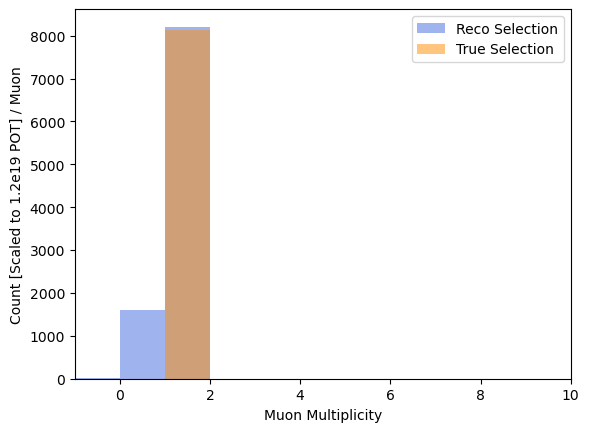

In [5]:
# Look at muon multiplicity between reco and truth samples
fig, ax = plt.subplots()
plt.hist(df['true_ixn_muon_mult'], bins=pi0_mult_bins, histtype='stepfilled', label='Reco Selection', color='royalblue', alpha=0.5)
plt.hist(df_true['true_ixn_muon_mult'], bins=pi0_mult_bins, histtype='stepfilled', label='True Selection', color='darkorange', alpha=0.5)
plt.xlim(-1,10)
ax.set_xlabel(r"Muon Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Muon")
plt.legend()

In [4]:
#DEFINE: Bins for num pi0s
num_pi0_bins = 50
max_num_pi0s = 50
pi0_mult_bins = np.linspace(-1,max_num_pi0s, num_pi0_bins+2)

# GET: Bin numbers for num pi0s (true)
true_pi0_mult_bin_nums = np.digitize(df['true_ixn_pi0_mult'], pi0_mult_bins)
true_cont_pi0_mult_bin_nums = np.digitize(df['true_ixn_cont_pi0_mult'], pi0_mult_bins)
print(true_pi0_mult_bin_nums)
true_muon_mult_bin_nums = np.digitize(df['true_ixn_muon_mult'], pi0_mult_bins)
true_proton_mult_bin_nums = np.digitize(df['true_ixn_proton_mult'], pi0_mult_bins)
true_charged_pion_mult_bin_nums = np.digitize(df['true_ixn_chpion_mult'], pi0_mult_bins)
true_charged_kaon_mult_bin_nums = np.digitize(df['true_ixn_chkaon_mult'], pi0_mult_bins)

true_pi0_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_pi0_mult'], pi0_mult_bins)
true_cont_pi0_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_cont_pi0_mult'], pi0_mult_bins)
true_muon_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_muon_mult'], pi0_mult_bins)
true_proton_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_proton_mult'], pi0_mult_bins)
true_charged_pion_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_chpion_mult'], pi0_mult_bins)
true_charged_kaon_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_chkaon_mult'], pi0_mult_bins)

# POPULATE: Add Bin numbers columns to df:
df['true_pi0_mult_bin'] = true_pi0_mult_bin_nums
df['true_cont_pi0_mult_bin'] = true_cont_pi0_mult_bin_nums

df_true['true_pi0_mult_bin'] = true_pi0_mult_bin_nums_truth_sample
df_true['true_cont_pi0_mult_bin'] = true_cont_pi0_mult_bin_nums_truth_sample

# CHECK: Progress
df.head()
print(df.columns)

[3 3 5 3 2 2 2 4 4 3 3 2 4 4 4 5 3 6 2 3 4 3 2 2 3 2 4 2 3 2 2 2 3 2 3 3 3
 2 3 3 2 3 3 3 2 2 3 2 3 4 3 3 3 3 3 2 5 2 2 2 2 4 3 4 2 2 3 5 2 2 3 2 4 4
 4 3 3 4 4 4 3 2 2 7 3]
Index(['reco_ixn_gamma_mult', 'reco_ixn_e_mult', 'reco_ixn_index',
       'reco_ixn_cont_gamma_mult', 'reco_ixn_e_cont_mult',
       'reco_ixn_muon_mult', 'reco_ixn_chpi_mult', 'reco_ixn_proton_mult',
       'reco_ixn_chkaon_mult', 'reco_ixn_vtx_x_pos', 'reco_ixn_vtx_y_pos',
       'reco_ixn_vtx_z_pos', 'true_ixn_pi0_mult', 'true_ixn_cont_pi0_mult',
       'true_ixn_e_mult', 'true_ixn_gamma_mult', 'true_ixn_index',
       'true_ixn_muon_mult', 'true_ixn_chpi_mult', 'true_ixn_proton_mult',
       'true_ixn_chkaon_mult', 'true_ixn_vtx_x_pos', 'true_ixn_vtx_y_pos',
       'true_ixn_vtx_z_pos', 'spill_index', 'file_index', 'event', 'run',
       'subrun', 'caf_file_name', 'overlap', 'true_pi0_mult_bin',
       'true_cont_pi0_mult_bin'],
      dtype='object')


In [16]:
#DEFINE: Bins for num gammas, electrons
num_gamma_bins = 50
max_num_gamma = 50
gamma_mult_bins = np.linspace(0.,max_num_gamma, num_gamma_bins)

num_electron_bins = 50
max_num_electron = 50
electron_mult_bins = np.linspace(0.,max_num_electron, num_electron_bins)

# GET: Bin numbers for num gammas, electrons (true)
true_gamma_mult_bin_nums = np.digitize(df['true_ixn_gamma_mult'], gamma_mult_bins)
reco_gamma_mult_bin_nums = np.digitize(df['reco_ixn_gamma_mult'], gamma_mult_bins)

true_gamma_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_gamma_mult'], gamma_mult_bins)
reco_gamma_mult_bin_nums_truth_sample = np.digitize(df_true['reco_ixn_gamma_mult'], gamma_mult_bins)

true_electron_mult_bin_nums = np.digitize(df['true_ixn_e_mult'], electron_mult_bins)
reco_electron_mult_bin_nums = np.digitize(df['reco_ixn_e_mult'], electron_mult_bins)

true_electron_mult_bin_nums_truth_sample = np.digitize(df_true['true_ixn_e_mult'], electron_mult_bins)
reco_electron_mult_bin_nums_truth_sample = np.digitize(df_true['reco_ixn_e_mult'], electron_mult_bins)

# POPULATE: Add Bin numbers columns to df:
df['true_gamma_mult_bin'] = true_gamma_mult_bin_nums
df['reco_gamma_mult_bin'] = reco_gamma_mult_bin_nums

df_true['true_gamma_mult_bin'] = true_gamma_mult_bin_nums_truth_sample
df_true['reco_gamma_mult_bin'] = reco_gamma_mult_bin_nums_truth_sample

df['true_e_mult_bin'] = true_electron_mult_bin_nums
df['reco_e_mult_bin'] = reco_electron_mult_bin_nums

df_true['true_e_mult_bin'] = true_electron_mult_bin_nums_truth_sample
df_true['reco_e_mult_bin'] = reco_electron_mult_bin_nums_truth_sample

# Add column for reco shower multiplicity
df['reco_shower_mult'] = df['reco_ixn_gamma_mult'] + df['reco_ixn_e_mult']
df_true['reco_shower_mult'] = df_true['reco_ixn_gamma_mult'] + df_true['reco_ixn_e_mult']

In [6]:
# Filter for only events with 1 true pi0
df_one_true_pi0 = df#[df['true_pi0_mult_bin'] == 1]

[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.
 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


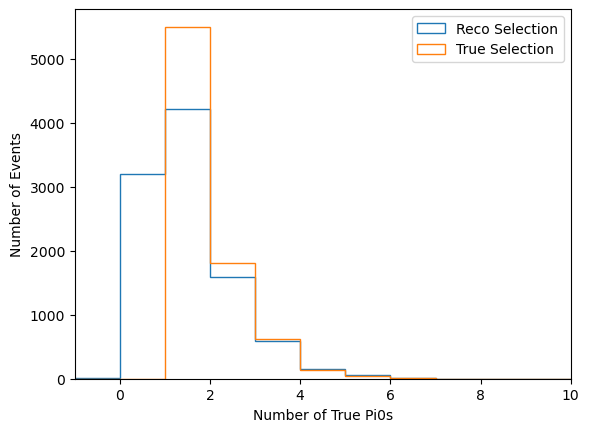

In [7]:
# Look at whether we see any pi0s / how true pi0 multiplicity is different between reco and truth samples

print(pi0_mult_bins)
plt.hist(df['true_ixn_pi0_mult'], bins=pi0_mult_bins, histtype='step', label='Reco Selection')
plt.hist(df_true['true_ixn_pi0_mult'], bins=pi0_mult_bins, histtype='step', label='True Selection')
plt.xlim(-1,10)
plt.xlabel('Number of True Pi0s')
plt.ylabel('Number of Events')
plt.legend()

12271 14792
27063



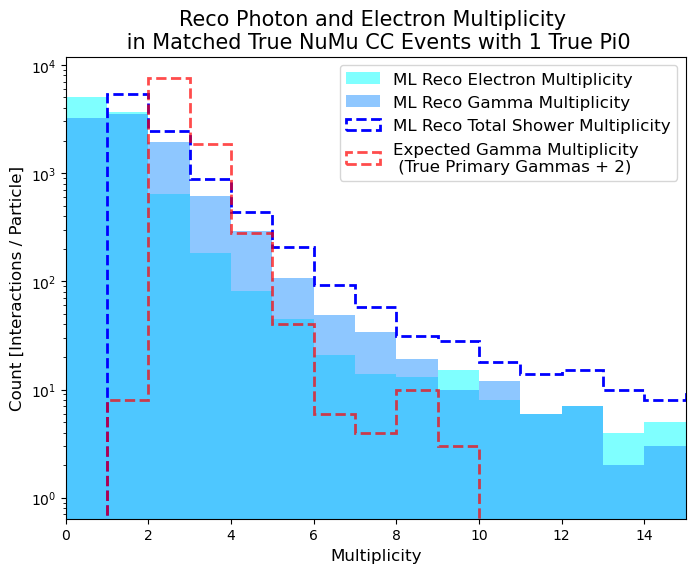

In [8]:
# Look at number of pi0s vs. number of gammas, electrons
fig = plt.figure(figsize=[8,6])
axs = fig.add_subplot(111)


#reco_gamma_counts, reco_gamma_bins, _ = axs.hist([df_one_true_pi0['reco_ixn_gamma_mult'], df_one_true_pi0['reco_ixn_e_mult']],\
#                                                 alpha=0.7, bins=15, range=(0, 15), stacked=True, histtype='stepfilled', color=['b', 'cyan'], label=['ML Reco Gamma Multiplicity', 'ML Reco Electron Multiplicity'])
#true_gamma_counts, true_gamma_bins, _ = axs.hist([df_one_true_pi0['true_ixn_gamma_mult'], df_one_true_pi0['true_ixn_e_mult']],\
#                                                alpha=1, bins=15, range=(0, 15), stacked=True, histtype='step', color=['r', 'lightsalmon'], label=['True Gamma Multiplicity', 'True Electron Multiplicity'], linewidth=2)
reco_electron_counts, reco_electron_bins, _ = axs.hist(df_one_true_pi0['reco_ixn_e_mult'], alpha=0.5, bins=20, range=(0, 20),\
                                                        histtype='stepfilled', color='cyan', label='ML Reco Electron Multiplicity')
reco_gamma_counts, reco_gamma_bins, _ = axs.hist(df_one_true_pi0['reco_ixn_gamma_mult'], alpha=0.5, bins=20, range=(0, 20),\
                                                        histtype='stepfilled', color='dodgerblue', label='ML Reco Gamma Multiplicity')
reco_shower_counts, reco_shower_bins, _ = axs.hist(np.array(df_one_true_pi0['reco_shower_mult']), alpha=1, bins=50, range=(0, 50),\
                                                        histtype='step', color='b', linestyle='--', linewidth=2, label='ML Reco Total Shower Multiplicity')
#true_gamma_counts, true_gamma_bins, _ = axs.hist(df_one_true_pi0['true_ixn_gamma_mult'], alpha=0.7, bins=15, range=(0, 15), histtype='stepfilled', color='r', label='True Gamma Multiplicity')
#true_electron_counts, true_electron_bins, _ = axs.hist(df_one_true_pi0['true_ixn_e_mult'], alpha=0.7, bins=15, range=(0, 15), histtype='stepfilled', color='pink', label='True Electron Multiplicity')
exp_gamma_counts, exp_gamma_bins, _ = axs.hist(np.array(df_one_true_pi0['true_ixn_gamma_mult'])+np.full_like(df_one_true_pi0['true_ixn_gamma_mult'], 2), linewidth=2,\
                                               alpha=0.7, bins=15, range=(0, 15), histtype='step', color='r', linestyle='--', label='Expected Gamma Multiplicity\n (True Primary Gammas + 2)')   
#true_pi0_counts, true_pi0_bins, _ = axs.hist(df_one_true_pi0['true_ixn_pi0_mult'], alpha=0.5, bins=15, range=(0, 15),histtype='stepfilled', label='True Pi0 Multiplicity')
axs.set_xlabel('Multiplicity', fontsize=12)
axs.set_ylabel('Count [Interactions / Particle]', fontsize=12)
axs.set_xlim(0, 15)
axs.set_yscale('log')
print(sum(df_one_true_pi0['reco_ixn_gamma_mult']), sum(df_one_true_pi0['reco_ixn_e_mult']))
print(sum(np.array(df_one_true_pi0['reco_ixn_e_mult'])+np.array(df_one_true_pi0['reco_ixn_gamma_mult'])))
print()


axs.legend(loc='upper right', fontsize=12)
axs.set_title('Reco Photon and Electron Multiplicity \n in Matched True NuMu CC Events with 1 True Pi0', fontsize=15)

#plt.tight_layout()
#plt.subplots_adjust(top=0.95, hspace=0.0)
#plt.savefig('/exp/dune/app/users/ehinkle/nd_analysis/2x2_CAFs/reco_studies/'+sample+'true_vs_reco_length_with_ovlp_cut_'+str(ovlp_cut)+'.pdf')
plt.show()